# Simple Linear Regression for Salary Prediction

This notebook provides a step-by-step mathematical representation of the univariate linear regression model using SymPy, applied to predict salaries based on a dataset. We will derive the model equations, explore data preprocessing, model training, evaluation, and visualization to understand the relationship between the predictor variable (e.g., years of experience) and the target variable (salary). The goal is to build a predictive model that can estimate salaries while illustrating the underlying mathematics.

## Tools Used
- **Python**: Programming language for data analysis and machine learning.
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **SymPy**: For symbolic mathematics and step-by-step mathematical derivations.


## Linear Regression Formula

Linear regression finds the best straight line that fits through our data. The line can be described with a simple equation:

***$$h = mx + c$$***

Where:
- **h** = The value we want to predict (salary)
- **x** = The input variable (years of experience)
- **m** = The slope (how much y changes when x increases by 1)
- **b** = The intercept (where the line crosses the y-axis)

The model works by finding the values of m and b that make the line fit the data as closely as possible. We do this by minimizing the total squared distance between the actual data points and the predicted line.


## Cost Function (Mean Squared Error)

The cost function measures how far our predictions are from the actual values. It's the function we want to minimize to find the best line.

### Formula

$$J(m, c) = \frac{1}{2n} \sum_{i=1}^{n}(y_{pred} - y_{actual})^2$$

**Expanded form:**

$$J(m, c) = \frac{1}{2n} \sum_{i=1}^{n}(mx + c - y)^2$$

### Parameters

- **m** : Slope of the line (weight) - determines the steepness
- **c** : Y-intercept (bias) - where the line crosses the y-axis
- **x** : Input variable (years of experience)
- **y** : Actual output value (salary)
- **n** : Total number of data points
- **y_pred = mx + c** : Predicted value for a given x

### How It Works

1. **Calculate errors**: For each data point, find the difference between the predicted value (mx + c) and the actual value (y)
2. **Square the errors**: Square each difference to penalize larger errors more heavily and make all errors positive
3. **Sum squared errors**: Add up all the squared differences
4. **Average the errors**: Divide by 2n to normalize the cost (the factor of 2 is for mathematical convenience in derivatives)
5. **Minimize**: Find the values of m and c that minimize J(m, c) to get the best-fitting line

The division by 2n ensures that the cost doesn't grow with the size of the dataset, making it comparable across different datasets.

In [ ]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## STEP 1: Define Symbolic Variables

In [ ]:

sp.init_printing(use_unicode=False, use_latex="mathjax")
m, b, x, y = sp.symbols('m b x y')

## STEP 2: Defining HYPOTHESIS in symbolic notations

In [ ]:

hypothesis = m * x + b
print("\nStep 2: Hypothesis Formula")
sp.pprint(hypothesis)


Step 2: Hypothesis Formula
b + m*x


## STEP 3: Defining COST FUNCTION Mean Squared Error (MSE)

In [ ]:

cost_func = (hypothesis - y)**2
print("\nStep 3: Cost Function (Single Point MSE)")
sp.pprint(cost_func)


Step 3: Cost Function (Single Point MSE)
             2
(b + m*x - y) 


## STEP 4: DIFFERENTIAL EQUATIONS & GRADIENTS

In [ ]:

# Create unevaluated derivative objects for display
grad_m_eqn = sp.Derivative(cost_func, m)
grad_b_eqn = sp.Derivative(cost_func, b)

In [ ]:
# Calculate the actual derivative expressions
grad_m_expr = grad_m_eqn.doit()
grad_b_expr = grad_b_eqn.doit()

In [ ]:
print("\nStep 4: Symbolic Gradients (Calculus)", end="\n")
print("Partial Derivative for Weight (m):", end="\n")

print("\n\n")
sp.pprint(grad_m_eqn)
print("Evaluates to:")
sp.pprint(grad_m_expr)


Step 4: Symbolic Gradients (Calculus)
Partial Derivative for Weight (m):



d /             2\
--\(b + m*x - y) /
dm                
Evaluates to:
2*x*(b + m*x - y)


In [ ]:
print("\nPartial Derivative for Bias (b):")


print("\n\n")
sp.pprint(grad_b_eqn)
print("Evaluates to:")
sp.pprint(grad_b_expr)


Partial Derivative for Bias (b):



d /             2\
--\(b + m*x - y) /
db                
Evaluates to:
2*b + 2*m*x - 2*y


## STEP 5: DATA LOADING WITH PANDAS

In [ ]:

print("\nStep 5: Loading Data with Pandas", end="\n")
try:
    # Replace 'data.csv' with your actual file path
    df = pd.read_csv('../data/Salary_Data.csv')
    X_train = df['YearsExperience'].values
    Y_train = df['Salary'].values
    print("\nData successfully loaded from CSV using Pandas.")

except FileNotFoundError:
    print("\nCSV not found. Using placeholder data for demonstration.")
    X_train = np.array([1, 2, 3, 4, 5])
    Y_train = np.array([3.1, 4.9, 7.2, 8.8, 11.1])

print("X_train = " ,X_train)
print("Y_train = ", Y_train)


Step 5: Loading Data with Pandas

Data successfully loaded from CSV using Pandas.
X_train =  [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
Y_train =  [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## STEP 6: GRADIENT DESCENT TRAINING

In [ ]:

def train_linear_regression(data_x, data_y, lr=0.01, epochs=1000):
    curr_m, curr_b = 0.0, 0.0
    n = len(data_x)
    print(f"\nStep 6: Training (LR={lr}, Epochs={epochs})...")

    for epoch in range(epochs):
        sum_grad_m = 0
        sum_grad_b = 0
        for xi, yi in zip(data_x, data_y):
            subs = {m: curr_m, b: curr_b, x: xi, y: yi}
            sum_grad_m += grad_m_expr.subs(subs)
            sum_grad_b += grad_b_expr.subs(subs)

        curr_m -= lr * (sum_grad_m / n)
        curr_b -= lr * (sum_grad_b / n)

        if epoch % 250 == 0:
            print(f"  Epoch {epoch}: m = {float(curr_m):.4f}, b = {float(curr_b):.4f}")

    return float(curr_m), float(curr_b)



## STEP 7: ACCURACY & VISUALIZATION

In [ ]:

def evaluate_and_plot(data_x, data_y, fm, fb):
    y_true = np.array(data_y)
    y_pred = fm * data_x + fb

    # Accuracy Metrics
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    mae = np.mean(np.abs(y_true - y_pred))

    print("\nStep 7: Accuracy Metrics")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - Mean Absolute Error (MAE): {mae:.4f}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(data_x, data_y, color='red', label='Actual Data')
    plt.plot(data_x, y_pred, color='blue', label=f'Model: y={fm:.2f}x + {fb:.2f}')
    plt.title('Linear Regression Fit (SymPy + Pandas)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## STEP 8: COMPUTING THE TOTAL COST

In [ ]:
cost_lambda = sp.lambdify((m, b, x, y), cost_func, 'numpy')

def compute_total_cost(m_val, b_val, x_data, y_data):
    # Calculates the average MSE for a grid of m and b values
    total_error = 0
    for xi, yi in zip(x_data, y_data):
        total_error += cost_lambda(m_val, b_val, xi, yi)
    return total_error / len(x_data)

## STEP 7: CONTOUR PLOT VISUALIZATION


Step 6: Training (LR=0.01, Epochs=1000)...
  Epoch 0: m = 9547.9740, b = 1520.0600


  Epoch 250: m = 10671.8689, b = 17558.0961
  Epoch 500: m = 9873.3577, b = 22939.0514
  Epoch 750: m = 9596.6704, b = 24803.5731

Step 7: Accuracy Metrics
  - R² Score: 0.9569
  - Mean Absolute Error (MAE): 4637.6030


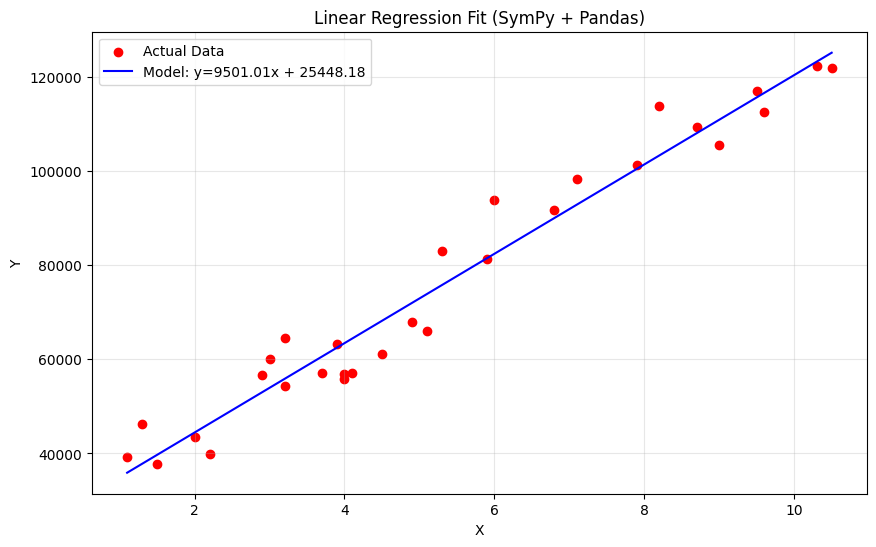

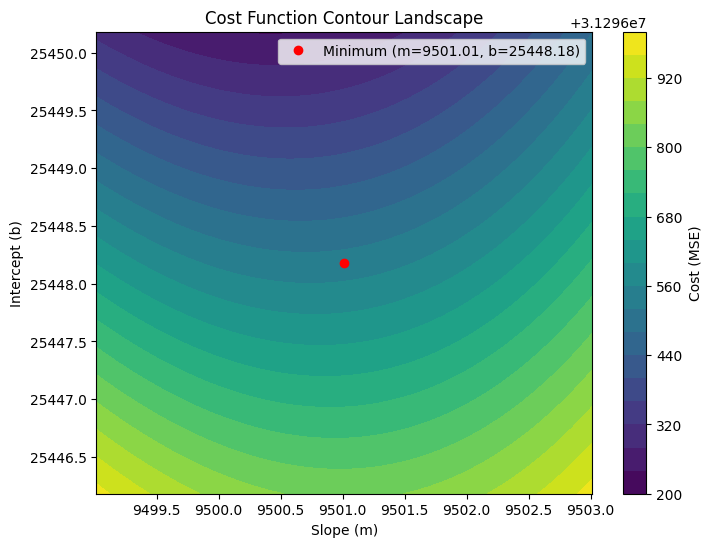

In [ ]:

def plot_cost_contour(data_x, data_y, fm, fb):
    # 1. Create a grid of m and b values around our final solution
    m_range = np.linspace(fm - 2, fm + 2, 50)
    b_range = np.linspace(fb - 2, fb + 2, 50)
    M, B = np.meshgrid(m_range, b_range)

    # 2. Compute cost for every point on the grid
    Z = np.array([compute_total_cost(mv, bv, data_x, data_y) for mv, bv in zip(np.ravel(M), np.ravel(B))])
    Z = Z.reshape(M.shape)

    # 3. Plotting
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(M, B, Z, levels=20, cmap='viridis') # Filled contours
    plt.colorbar(cp, label='Cost (MSE)')

    # Mark the final optimized point
    plt.plot(fm, fb, 'ro', label=f'Minimum (m={fm:.2f}, b={fb:.2f})')

    plt.title('Cost Function Contour Landscape')
    plt.xlabel('Slope (m)')
    plt.ylabel('Intercept (b)')
    plt.legend()
    plt.show()

final_m, final_b = train_linear_regression(X_train, Y_train)
evaluate_and_plot(X_train, Y_train, final_m, final_b)
plot_cost_contour(X_train, Y_train, final_m, final_b)

In [ ]:
# # Testing the Model
# df_test = pd.read_csv("../data/Salary_Data_test.csv")

# df_test

In [ ]:
# X_test = df_test["YearsExperience"].values
# y_test = df_test["Salary"].values

In [ ]:
# X_test

In [ ]:
# y_test

In [ ]:
# def predict(x_test):
#     y_preds = []
#     for x_t in x_test:
#         res = final_m * x_t + final_b
#         y_preds.append(res)
#     return y_preds
